In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

请选择：
 A：线性可分数据集；B：线性不可分数据集A


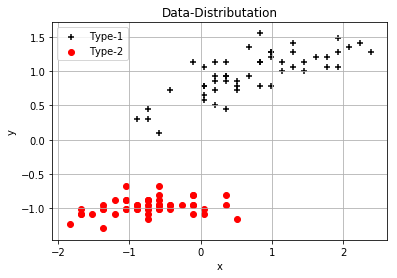

This is 0 iteration,the number of errors is 22 


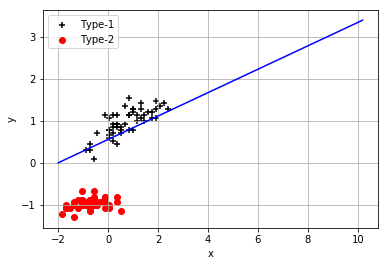

This is 1 iteration,the number of errors is 17 
This is 2 iteration,the number of errors is 1 
This is 3 iteration,the number of errors is 1 
This is 4 iteration,the number of errors is 1 
This is 5 iteration,the number of errors is 1 
This is 6 iteration,the number of errors is 0 
This is 7 iteration,the number of errors is 0 
This is 8 iteration,the number of errors is 0 
This is 9 iteration,the number of errors is 0 
This is 10 iteration,the number of errors is 0 


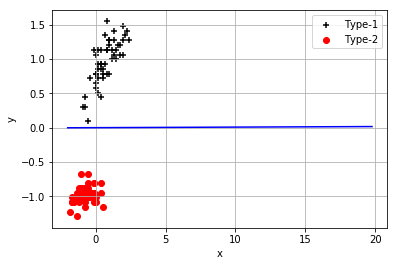

This is 11 iteration,the number of errors is 0 
This is 12 iteration,the number of errors is 0 
This is 13 iteration,the number of errors is 0 
This is 14 iteration,the number of errors is 0 
This is 15 iteration,the number of errors is 0 
This is 16 iteration,the number of errors is 0 
This is 17 iteration,the number of errors is 0 
This is 18 iteration,the number of errors is 0 
This is 19 iteration,the number of errors is 0 
This is 20 iteration,the number of errors is 0 


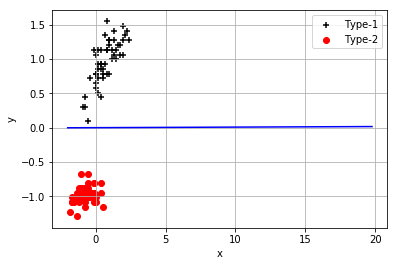

This is 21 iteration,the number of errors is 0 


In [22]:

'''
    更新方法——wk+1 = pk*(-x0)
    x0为更新
'''
class Perceptron():
    def __init__(self,width,learningRate):
        '''
        初始化感知器，随机生成权重weight与bias,width为数据x的维度,w0为bias
        采取固定增量法
        '''
        self.lr=learningRate
        self.weight=np.random.rand(1,width+1)
        self.width=width
        #w0 is bias
    
    def signFunc(self,y):
        '''激活函数，判断正负'''
        if y>0:
            return 1
        elif y <0:
            return -1
        else:
            return 0
    
    def predict(self,Data):
        '''
        对输入的数据进行预测
        '''
        #x = np.insert(Data,0,values = [1.0],axis=0)
        y = np.sum(np.multiply(self.weight,Data))
        y = np.dot(self.weight,Data)
        pre_result = self.signFunc(y)
        return y,pre_result
    
    def updateWeight(self,dataset):
        '''
        权重更新function
        '''
        for i in range(len(dataset)):
            #self.weight[1:] += self.lr*dataset[i][1]*dataset[i][0].reshape((2,1))
            #self.weight[0] += self.lr
            #x = np.insert(dataset[i][0],0,values = [1.0],axis=0)
            #print('before',self.weight)
            self.weight += self.lr*dataset[i][1]*dataset[i][0].reshape((1,1+self.width))
            #print('after',self.weight)
        
    def getWeight(self):
        return self.weight
    
def main():
    p = 0.5
    iteration = 22
    width = 2
    percep = Perceptron(width,learningRate=p)
    
    '''
    网上找了一个数据集
    '''
    data=None
    flag = None
    if input('请选择：\n A：线性可分数据集；B：线性不可分数据集') == 'A':
        data = pd.read_csv('./data/data1.csv',header=None)
        flag =1 
    else:
        data = pd.read_csv('./data/data2.csv',header=None)
        flag=0
    TrainX=data.iloc[:,:2].values
    TrainY=data.iloc[:,2].values
    
    # 数据预处理
    # 求均值
    u = np.mean(TrainX, axis=0)
    # 方差
    v = np.std(TrainX, axis=0)
    TrainX = (TrainX - u) / v
    
    #数据点初始分布
    if flag :
        plt.scatter(TrainX[:50,0],TrainX[:50,1],color='black',marker='+',label='Type-1')
        plt.scatter(TrainX[50:,0],TrainX[50:,1],color='red',marker='o',label='Type-2')
    else:
        plt.scatter(TrainX[:25,0],TrainX[:25,1],color='black',marker='+',label='Type-1')
        plt.scatter(TrainX[75:,0],TrainX[75:,1],color='black',marker='+',label='Type-1')
        plt.scatter(TrainX[25:75,0],TrainX[25:75,1],color='red',marker='o',label='Type-2')
        iteration=52
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()
    plt.legend(loc='best')
    plt.title('Data-Distributation')
    plt.show()
    
    # X加上偏置项w0
    TrainX = np.hstack((np.ones((TrainX.shape[0],1)), TrainX))
    
    for i in range(iteration):
        #进行预测
        
        #使用集合保存出错的数据集
        ErrorDatas=[]#
        for j in range(len(TrainX)):
            y,pred = percep.predict(TrainX[j])
            if pred != TrainY[j]:
                ErrorDatas.append([TrainX[j],TrainY[j]])
        print('This is %d iteration,the number of errors is %d '%(i,len(ErrorDatas)))
        
        #Update weight
        if len(ErrorDatas) !=0:
            #print(ErrorDatas)
            percep.updateWeight(ErrorDatas)
        
        #每隔10个周期输出一次分布状况
        if i%10 is 0:
            if flag :
                plt.scatter(TrainX[:50,1],TrainX[:50,2],color='black',marker='+',label='Type-1')
                plt.scatter(TrainX[50:,1],TrainX[50:,2],color='red',marker='o',label='Type-2')
            else:
                plt.scatter(TrainX[:25,1],TrainX[:25,2],color='black',marker='+',label='Type-1')
                plt.scatter(TrainX[75:,1],TrainX[75:,2],color='black',marker='+',label='Type-1')
                plt.scatter(TrainX[25:75,1],TrainX[25:75,2],color='red',marker='o',label='Type-2')
            w = percep.getWeight()
            x1 = -2
            y1 = -1/w[0][1] * (w[0][0]+w[0][2]*x1)
            x2 = 0
            y2 = -1/w[0][1] * (w[0][0]+w[0][2]*x2)
            plt.plot([x1,y1],[x2,y2],'b')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.grid()
            plt.legend(loc='best')
            plt.show()

if __name__ == '__main__':
    main()